In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from time import process_time

class Summary:
    def __init__(self, data, *args):
        self._summary = data
        
    def get_descr(self, colname):
        
        """Returns the description of a specific variable"""
        
        return self._summary.loc[self._summary["Variable"] == colname, "Description"].values[0]
    
    def get_type(self, colname):
        
        """Returns the type of a specific variable"""
        
        return self._summary.loc[self._summary["Variable"] == colname, "Type"].values[0]
    
    def get_ifna(self, colname):
        
        """Returns whether a specific variable allows NA values"""
        
        return self._summary.loc[self._summary["Variable"] == colname, "Accepts NAs"].values[0]
    
    def get_cols_by_type(self, type):
        
        """Returns the names of the variables of a certain type. If you want the output
        to be a list, you must transform it to list (list(get_cols_by_type('int')))"""
        
        return self._summary.loc[self._summary["Type"] == type, "Variable"]

nov2014 = pd.read_csv(r"Nov2014.csv", sep = ";")
summary = Summary(pd.read_csv(r"../DATOS/VariablesDescr.csv", sep = ";", nrows = 15))

In [13]:
nov2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4965848 entries, 0 to 4965847
Data columns (total 18 columns):
 #   Column           Dtype  
---  ------           -----  
 0   bookingdate      object 
 1   arrivaldate      object 
 2   poocountry       object 
 3   origincity       object 
 4   destinationcity  object 
 5   bookingsign      object 
 6   leadtime         int64  
 7   paxprofile       object 
 8   lengthofstay     int64  
 9   losname          object 
 10  cabinclass       object 
 11  distchannel      object 
 12  pax              int64  
 13  numpss           int64  
 14  numnss           int64  
 15  bookingday       object 
 16  losclean         float64
 17  losnameclean     object 
dtypes: float64(1), int64(5), object(12)
memory usage: 682.0+ MB


In [14]:
#Change data types accordingly:

#Datetime
for var in list(summary.get_cols_by_type("datetime")):
    nov2014[var] = pd.to_datetime(nov2014[var])


#Categories
for var in list(summary.get_cols_by_type("factor")):
    nov2014[var] = nov2014[var].astype("category")

nov2014.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4965848 entries, 0 to 4965847
Data columns (total 18 columns):
 #   Column           Dtype         
---  ------           -----         
 0   bookingdate      datetime64[ns]
 1   arrivaldate      datetime64[ns]
 2   poocountry       category      
 3   origincity       category      
 4   destinationcity  category      
 5   bookingsign      category      
 6   leadtime         int64         
 7   paxprofile       category      
 8   lengthofstay     int64         
 9   losname          category      
 10  cabinclass       category      
 11  distchannel      category      
 12  pax              int64         
 13  numpss           int64         
 14  numnss           int64         
 15  bookingday       object        
 16  losclean         float64       
 17  losnameclean     object        
dtypes: category(8), datetime64[ns](2), float64(1), int64(5), object(2)
memory usage: 426.3+ MB


In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

numnov2014 = nov2014.loc[:, list(summary.get_cols_by_type("int"))]

X_train, X_test, Y_train, Y_test = train_test_split(numnov2014, nov2014.paxprofile, test_size = 0.33, random_state = 88)
print(Y_test[0:20])
scores = {}

4318720     LEISURE
1767435     LEISURE
2475032     LEISURE
3291112     LEISURE
2857613    BUSINESS
4259013       GROUP
255049      LEISURE
2529925     LEISURE
846333      LEISURE
2273985       GROUP
2623072     LEISURE
686521      LEISURE
2136708     LEISURE
1335734     LEISURE
3967423       GROUP
4954981     LEISURE
4660752     LEISURE
2470233    BUSINESS
343695      LEISURE
3532880     LEISURE
Name: paxprofile, dtype: category
Categories (4, object): ['BUSINESS', 'GROUP', 'LEISURE', 'VFR']


In [18]:
t1 = process_time()

for k in range(1, 12, 2):
    ta = process_time()
    knn = KNeighborsClassifier(n_neighbors = k, weights = "distance")
    knn.fit(X_train, Y_train)
    tA = process_time()
    print(f"Classifier trained in {tA-ta} s")
    
    pred = knn.predict(X_test)
    tB = process_time()
    print(f"Predictions made in {tB-tA} s")
    
    conf_matrix = confusion_matrix(Y_test, pred, labels = ["BUSINESS", "GROUP", "LEISURE", "VFR"])
    print(conf_matrix)
    
    scores[k] = conf_matrix, accuracy_score(Y_test, pred)
    tC = process_time()
    print(f"Iteración terminada: {tC-ta} s")

t2 = process_time()

print(f"Processed in {t2-t1} s")

Classifier trained in 24.0 s
Predictions made in 246.34375 s
[[ 139098     137  208361    1456]
 [    219   21019    1530     107]
 [ 209756     850 1015317     104]
 [   1529      24     205   39018]]
Iteración terminada: 277.34375 s
Classifier trained in 27.734375 s
Predictions made in 272.265625 s
[[ 129675      62  217794    1521]
 [    204   20917    1622     132]
 [ 145359     375 1080230      63]
 [    661      12     174   39929]]
Iteración terminada: 308.625 s
Classifier trained in 30.265625 s
Predictions made in 270.328125 s
[[ 120896      56  226556    1544]
 [    123   20839    1766     147]
 [ 113578     260 1112146      43]
 [    508       9     185   40074]]
Iteración terminada: 308.953125 s
Classifier trained in 26.203125 s
Predictions made in 292.453125 s
[[ 110450      49  236991    1562]
 [     93   20699    1921     162]
 [  90851     199 1134944      33]
 [    476       3     179   40118]]
Iteración terminada: 325.625 s
Classifier trained in 27.859375 s
Predictions

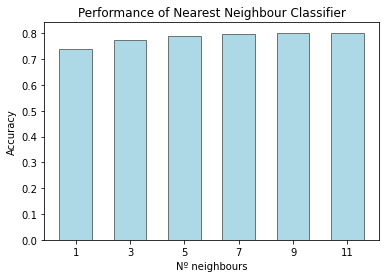

In [46]:
import matplotlib.pyplot as plt

plt.bar(np.arange(1,12,2), [score[1] for score in scores.values()], width = 1.2, 
        color = "lightblue", edgecolor = "black", linewidth = 0.5)
plt.xlabel("Nº neighbours")
plt.ylabel("Accuracy")
plt.title("Performance of Nearest Neighbour Classifier")
plt.xticks(np.arange(1, 12, 2), np.arange(1, 12, 2))
plt.show()

In [40]:
[round(score[1], 3) for score in scores.values()]

[0.741, 0.775, 0.79, 0.797, 0.8, 0.803]

In [47]:
[score[1] for score in scores.values()]

[0.7410934076998651,
 0.7754486706168802,
 0.7896084162735777,
 0.7970873786407767,
 0.8002660596925668,
 0.8025904206306103]

In [49]:
scores[11][0]

array([[ 108427,      38,  239016,    1571],
       [     83,   20519,    2087,     186],
       [  79706,     161, 1146146,      14],
       [    467,       2,     170,   40137]], dtype=int64)

In [50]:
["BUSINESS", "GROUP", "LEISURE", "VFR"]

['BUSINESS', 'GROUP', 'LEISURE', 'VFR']

In [52]:
info = {"BUSINESS" : [], "GROUP" : [], "LEISURE" : [], "VFR": []}
for i in range(4):
    info[["BUSINESS", "GROUP", "LEISURE", "VFR"][i]] = [array[i] for array in scores[11][0]]

In [59]:
df = pd.DataFrame(info, index = ["BUSINESS", "GROUP", "LEISURE", "VFR"])
df

,BUSINESS,GROUP,LEISURE,VFR
BUSINESS,108427,38,239016,1571
GROUP,83,20519,2087,186
LEISURE,79706,161,1146146,14
VFR,467,2,170,40137


In [64]:
(df.iloc[0,0] + df.iloc[1,1] + df.iloc[2,2] + df.iloc[3,3]) / df.sum().sum()

0.8025904206306103